In [1]:
from MachineLearningModule import *
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
table = pd.read_csv("Combined_Two_Port_Check_Standard.csv")

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,16,18,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
table_dictionary_system = split_table_by_columns(table, "Device_Id", "System_Id","Measurement_Date")

In [4]:
table_dictionary_system.remove_column_duplicates("Frequency")

In [5]:
table_dictionary_system.remove_short_tables(10)

In [6]:
table_dictionary_system.keep_only_certain_columns("Frequency","magS11","magS21","magS22")

In [7]:
value_system = table_dictionary_system.convert_to_array_dictionary_system()

In [8]:
value_system.interpolate_data(50,"Frequency",("magS11","magS21","magS22"))

In [9]:
good_fake_data_system = value_system.make_fake_data_system_slope("Frequency",
                                                                 ("magS11", "magS21", "magS22"),
                                                                 15000,
                                                                 ("CTN210", "System 2,7"),
                                                                 [0.003, 0.0001, 0.001],
                                                                 [0.00110, 0.00015, 0.00441],
                                                                 [0.1, 0.08, 0.1])

In [10]:
bad_fake_data_system = value_system.make_fake_data_system_noise("Frequency",
                                                                ("magS11", "magS21", "magS22"),
                                                                15000,
                                                                ("CTN210", "System 2,7"),
                                                                (0.005, 0.001, 0.005))

In [11]:
frequency_vals = good_fake_data_system['Fake Dataset 1']["Frequency"]
good_magS11_arr = good_fake_data_system.get_dataset_variable_values("magS11")
good_magS21_arr = good_fake_data_system.get_dataset_variable_values("magS21")
good_magS22_arr = good_fake_data_system.get_dataset_variable_values("magS22")
bad_magS11_arr = bad_fake_data_system.get_dataset_variable_values("magS11")
bad_magS21_arr = bad_fake_data_system.get_dataset_variable_values("magS21")
bad_magS22_arr = bad_fake_data_system.get_dataset_variable_values("magS22")

In [12]:
magS11_classifier = train_classifier(good=good_magS11_arr,bad=bad_magS11_arr)
magS21_classifier = train_classifier(good=good_magS21_arr,bad=bad_magS21_arr)
magS22_classifier = train_classifier(good=good_magS22_arr,bad=bad_magS22_arr)

In [13]:
good_test_data_system = value_system.make_fake_data_system_slope("Frequency",
                                                                 ("magS11", "magS21", "magS22"),
                                                                 15000,
                                                                 ("CTN210", "System 2,7"),
                                                                 [0.003, 0.0001, 0.001],
                                                                 [0.00110, 0.00015, 0.00441],
                                                                 [0.1, 0.08, 0.1])
bad_test_data_system = value_system.make_fake_data_system_noise("Frequency",
                                                                ("magS11", "magS21", "magS22"),
                                                                15000,
                                                                ("CTN210", "System 2,7"),
                                                                (0.005, 0.001, 0.005))

In [14]:
test_magS11_arr = np.append(good_test_data_system.get_dataset_variable_values("magS11"),
                             bad_test_data_system.get_dataset_variable_values("magS11"),axis=0)
test_magS21_arr = np.append(good_test_data_system.get_dataset_variable_values("magS21"),
                             bad_test_data_system.get_dataset_variable_values("magS21"),axis=0)
test_magS22_arr = np.append(good_test_data_system.get_dataset_variable_values("magS22"),
                             bad_test_data_system.get_dataset_variable_values("magS22"),axis=0)

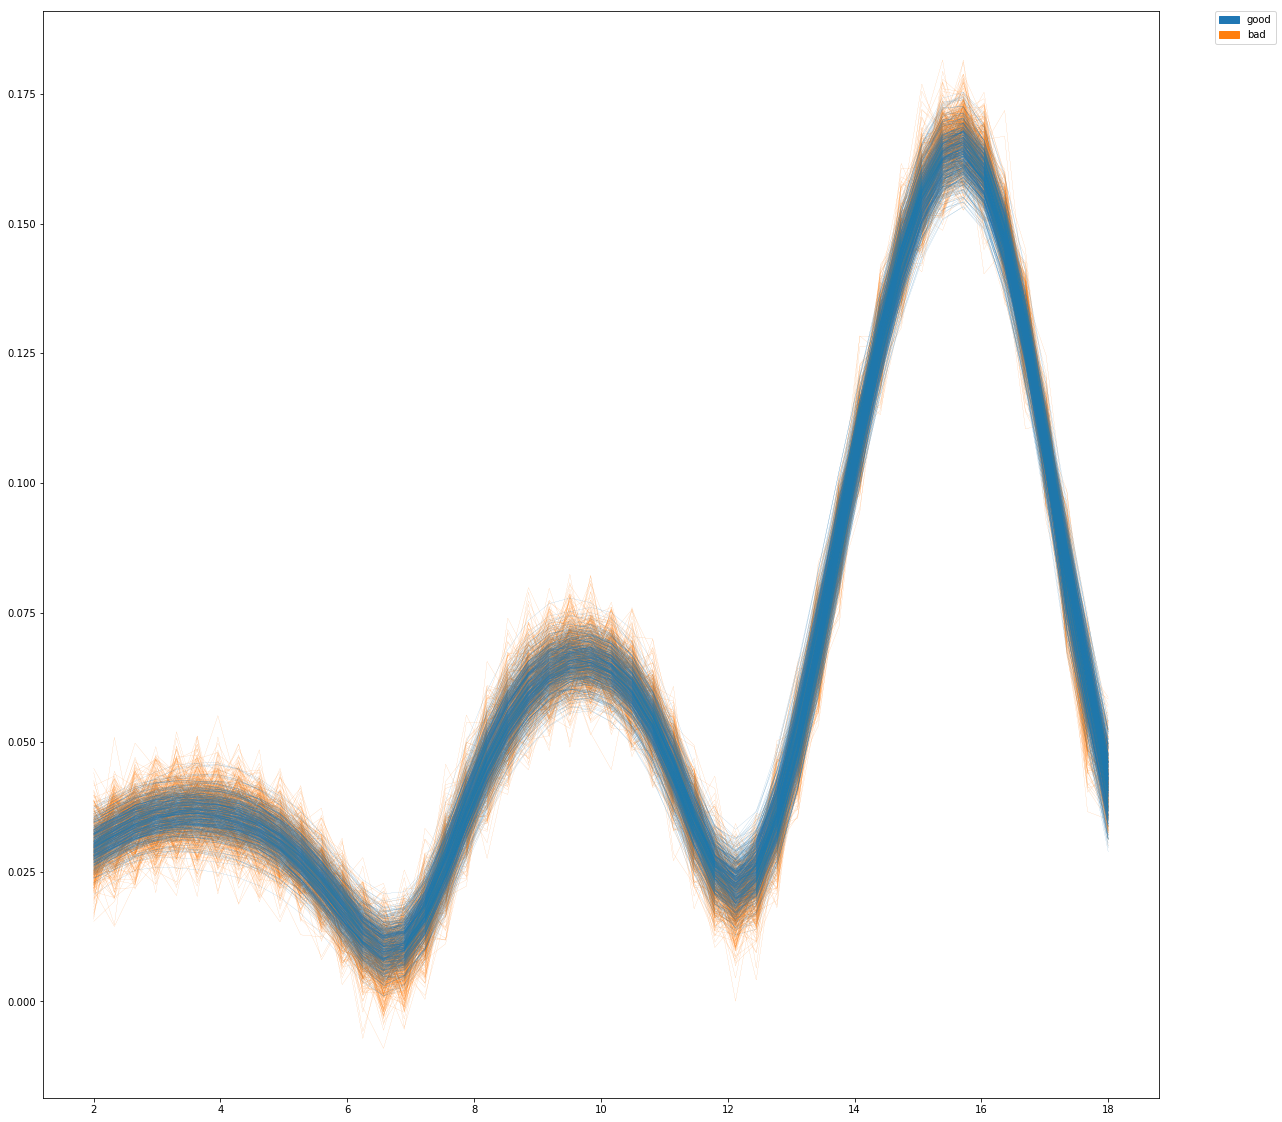

In [15]:
plt.figure(figsize=(20,20))
make_prediction_graph(magS11_classifier,
                      frequency_vals,
                      test_magS11_arr,
                      num_lines=1000,
                      z_indexes={"good": 1, "bad": 0},lw=0.1)
plt.show()

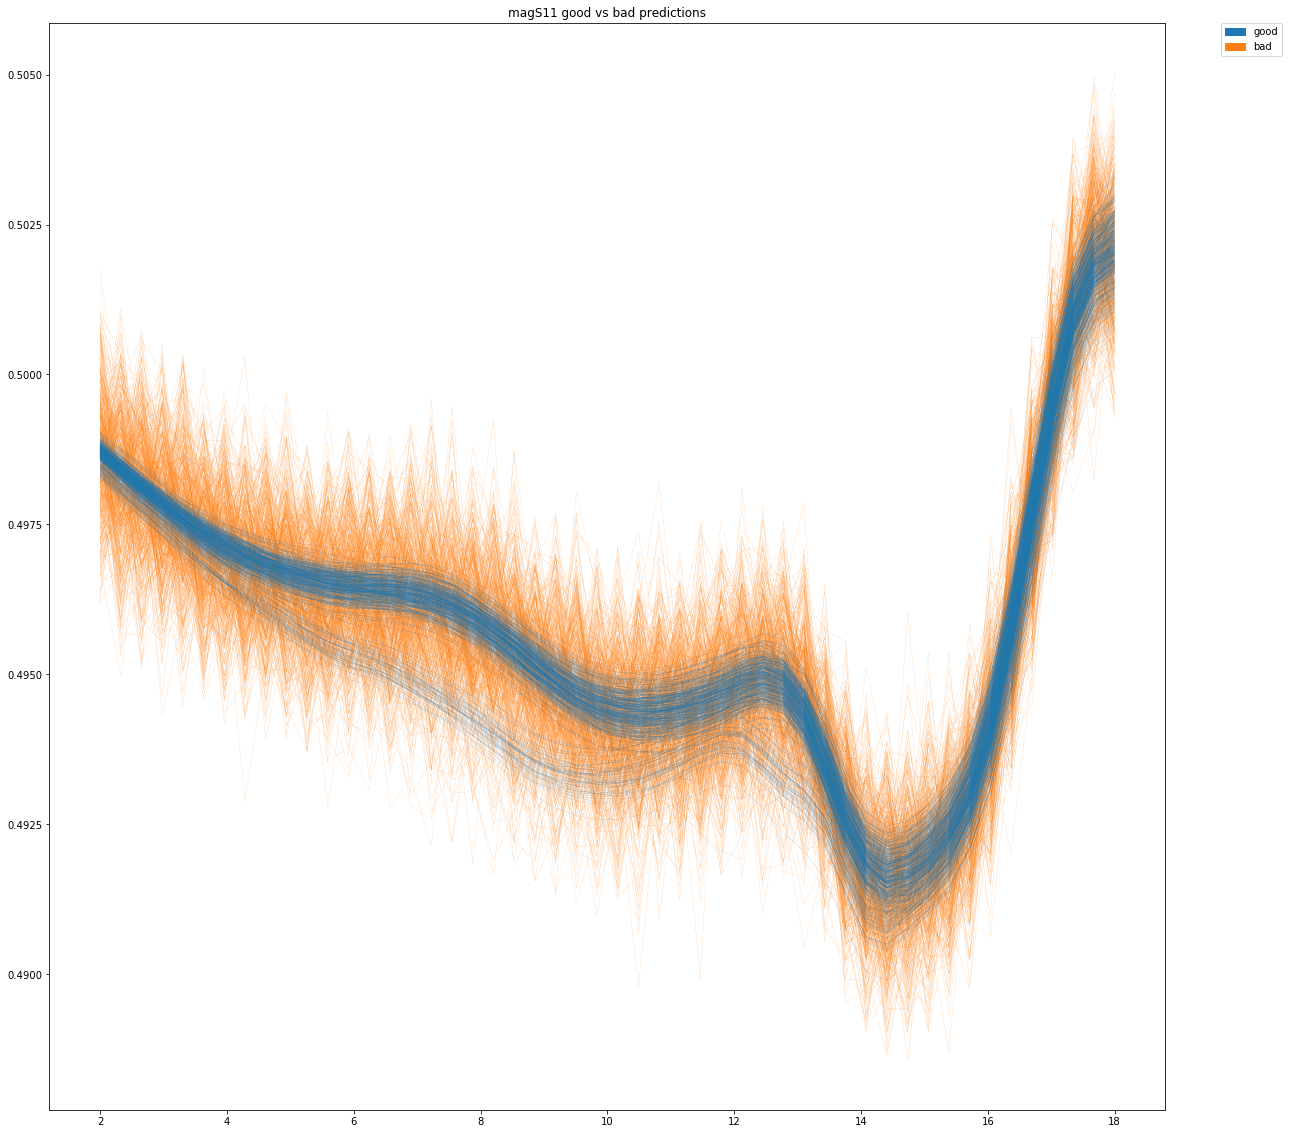

In [16]:
plt.figure(figsize=(20,20))
make_prediction_graph(magS21_classifier,
                      frequency_vals,
                      test_magS21_arr,
                      num_lines=1000,
                      z_indexes={"good": 1, "bad": 0},lw=0.1)
plt.title("magS11 good vs bad predictions")
plt.show()

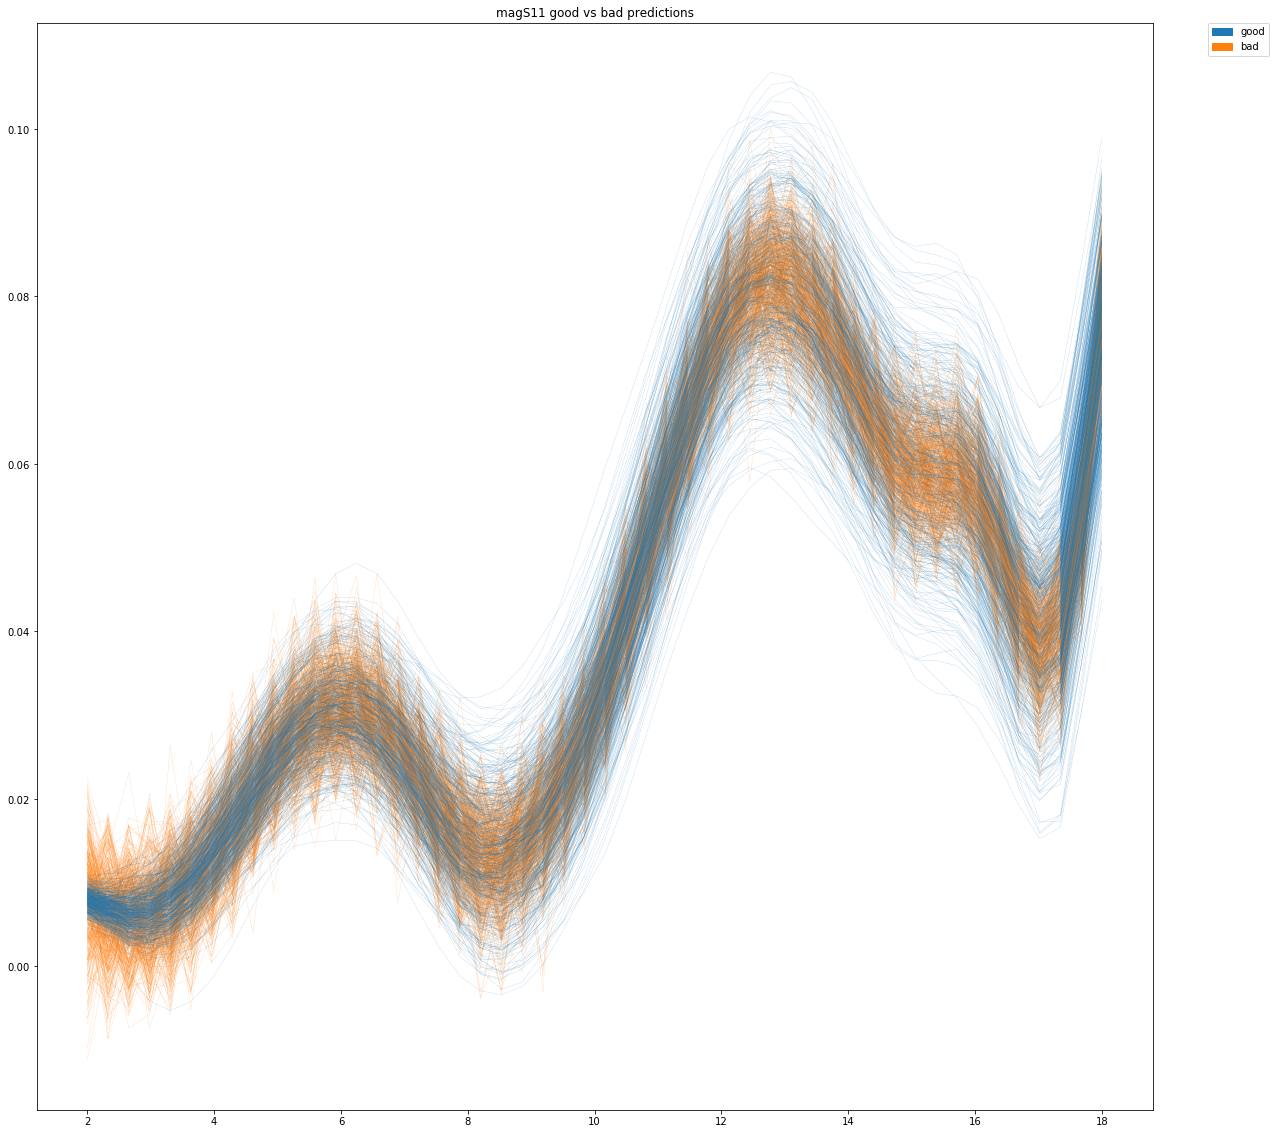

In [17]:
plt.figure(figsize=(20,20))
make_prediction_graph(magS22_classifier,
                      frequency_vals,
                      test_magS22_arr,
                      num_lines=1000,
                      z_indexes={"good": 1, "bad": 0},lw=0.1)
plt.title("magS11 good vs bad predictions")
plt.show()